In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [2]:
df=pd.read_csv("WineQT.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [3]:
df.shape

(1143, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [6]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

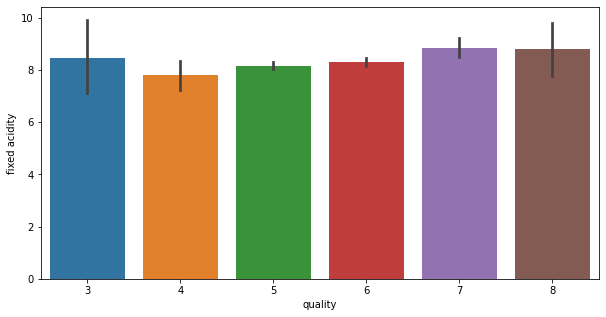

In [7]:
fig=plt.figure(figsize=(10,5))
sns.barplot(x="quality",y="fixed acidity",data=df)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

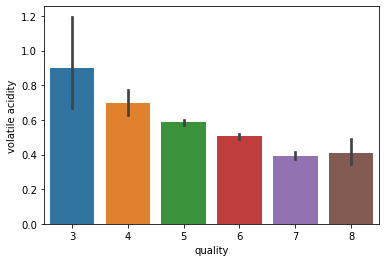

In [8]:
sns.barplot(x="quality",y="volatile acidity",data=df)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

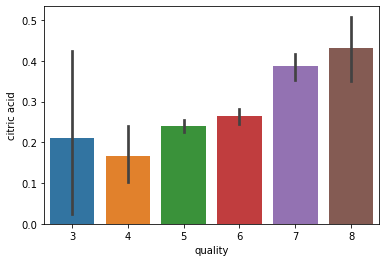

In [9]:
sns.barplot(x="quality",y="citric acid",data=df)

<AxesSubplot:>

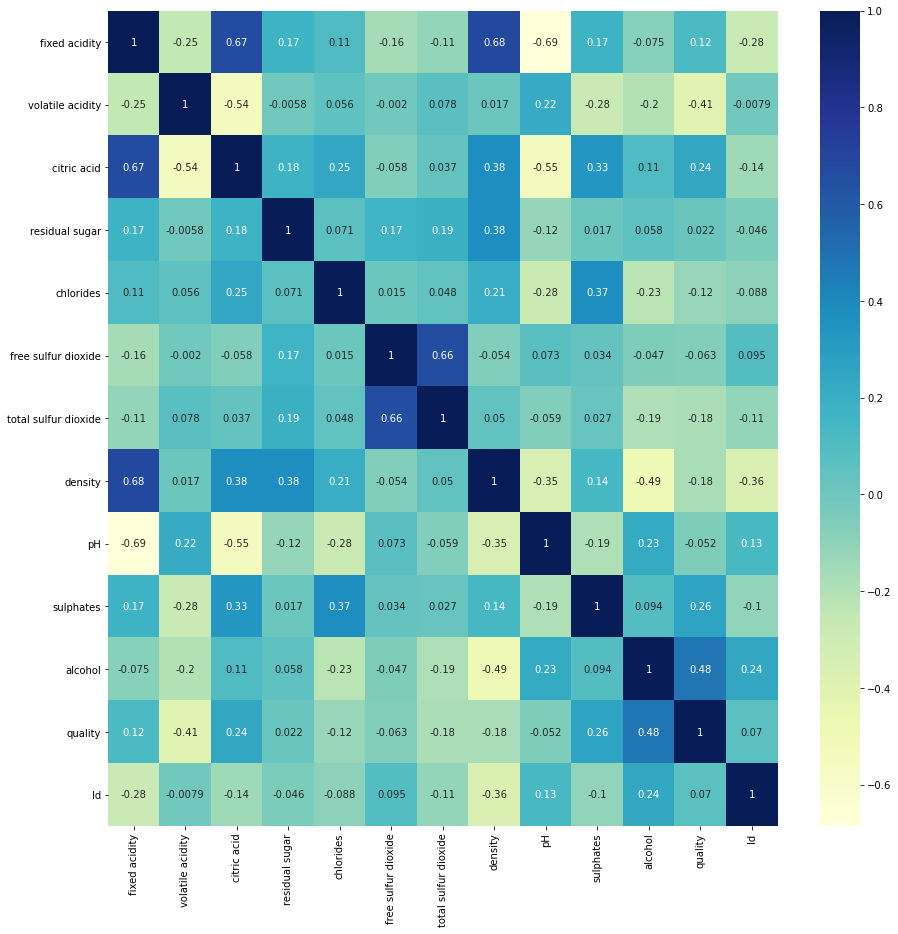

In [10]:
corr=df.corr()
plt.figure(figsize= (15,15))
sns.heatmap(corr,annot = True, cmap="YlGnBu")

In [11]:
df["quality"].value_counts()

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

In [12]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

C:\Users\manga\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

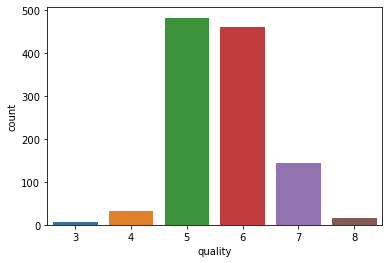

In [13]:
sns.countplot(df["quality"])

# SPLITTING THE DATASET

In [14]:
from sklearn.preprocessing import StandardScaler
standard_scaler=StandardScaler()

In [15]:
X=df.drop("quality",axis=1)
Y=df["quality"]

In [16]:
X=standard_scaler.fit_transform(X)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=30)

# Buiding the model

# Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression

lreg = LogisticRegression()
lreg.fit(X_train, Y_train)
y_pred_lreg = lreg.predict(X_test)

C:\Users\manga\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
logreg_accuracy = round(accuracy_score(Y_test, y_pred_lreg) * 100,2)
print('Accuracy = ', logreg_accuracy,'%')


Accuracy =  58.08 %


In [21]:
print(classification_report(Y_test, y_pred_lreg))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         8
           5       0.64      0.69      0.66        88
           6       0.58      0.59      0.58        97
           7       0.47      0.52      0.49        29
           8       0.00      0.00      0.00         5

    accuracy                           0.58       229
   macro avg       0.28      0.30      0.29       229
weighted avg       0.55      0.58      0.56       229



C:\Users\manga\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\manga\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\manga\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Random Forest Classification

In [22]:
rfc=RandomForestClassifier(n_estimators=300)
rfc.fit(X_train,Y_train)
pred_rfc=rfc.predict(X_test)
pred_rfc

array([7, 7, 6, 5, 5, 5, 6, 5, 6, 6, 6, 6, 6, 6, 6, 5, 6, 5, 6, 5, 6, 5,
       5, 7, 6, 5, 5, 6, 6, 5, 5, 5, 6, 5, 5, 6, 5, 5, 6, 6, 5, 6, 5, 7,
       5, 6, 5, 6, 6, 5, 7, 6, 5, 6, 6, 6, 6, 7, 6, 5, 7, 7, 5, 6, 5, 6,
       5, 5, 6, 5, 6, 5, 6, 6, 7, 6, 6, 7, 5, 6, 5, 7, 8, 6, 6, 6, 6, 5,
       5, 5, 5, 6, 5, 5, 6, 6, 5, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6,
       6, 7, 5, 6, 5, 5, 6, 5, 7, 6, 5, 6, 5, 5, 6, 6, 7, 6, 6, 6, 5, 6,
       5, 5, 6, 5, 7, 5, 5, 6, 5, 7, 7, 6, 6, 5, 6, 5, 5, 6, 5, 6, 5, 6,
       6, 5, 7, 6, 6, 5, 5, 5, 6, 6, 6, 6, 5, 5, 6, 5, 6, 5, 6, 7, 7, 6,
       5, 5, 5, 5, 7, 5, 6, 5, 7, 6, 5, 6, 6, 6, 7, 5, 6, 5, 5, 6, 5, 5,
       6, 6, 6, 7, 5, 5, 5, 6, 5, 5, 5, 7, 5, 6, 5, 6, 6, 5, 5, 6, 6, 7,
       5, 6, 6, 5, 5, 6, 5, 5, 7], dtype=int64)

In [23]:
rf_accuracy = round(accuracy_score(Y_test, pred_rfc) * 100,2)
print('Accuracy = ', rf_accuracy,'%')

Accuracy =  63.32 %


# Support Vector Machine

In [24]:
svc=SVC()
svc.fit(X_train,Y_train)
pred_svc=svc.predict(X_test)
pred_svc

array([7, 6, 5, 5, 6, 5, 6, 5, 6, 6, 6, 6, 7, 5, 6, 6, 5, 5, 6, 5, 6, 5,
       5, 6, 5, 5, 5, 5, 6, 6, 6, 6, 6, 5, 5, 6, 5, 6, 6, 6, 5, 6, 5, 7,
       5, 6, 5, 5, 5, 5, 6, 6, 5, 6, 5, 6, 6, 5, 5, 6, 6, 7, 5, 6, 5, 6,
       5, 5, 6, 5, 6, 5, 6, 6, 7, 6, 5, 7, 5, 6, 5, 6, 6, 7, 6, 5, 6, 5,
       5, 5, 5, 6, 5, 5, 6, 5, 6, 6, 5, 6, 5, 6, 5, 5, 5, 5, 5, 6, 6, 5,
       6, 7, 5, 6, 5, 5, 6, 5, 7, 6, 5, 5, 5, 5, 5, 6, 7, 6, 6, 6, 5, 5,
       5, 5, 6, 5, 7, 5, 5, 6, 5, 6, 6, 6, 6, 5, 6, 5, 6, 6, 5, 6, 5, 6,
       6, 5, 7, 7, 6, 5, 5, 5, 6, 6, 6, 6, 6, 5, 6, 5, 6, 5, 6, 7, 6, 6,
       5, 5, 5, 6, 6, 5, 6, 6, 7, 6, 5, 6, 6, 6, 7, 5, 6, 5, 5, 6, 5, 5,
       6, 6, 6, 7, 5, 5, 5, 6, 6, 5, 5, 7, 6, 6, 6, 5, 7, 5, 5, 5, 6, 7,
       5, 6, 6, 5, 5, 6, 6, 5, 7], dtype=int64)

In [25]:
svm_accuracy = round(accuracy_score(Y_test, pred_svc) * 100,2)
print('Accuracy = ', svm_accuracy,'%')

Accuracy =  62.45 %


# SGD

In [27]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(penalty=None)
sgd.fit(X_train, Y_train)
pred_sgd = sgd.predict(X_test)

In [28]:
svm_accuracy = round(accuracy_score(Y_test, pred_sgd) * 100,2)
print('Accuracy = ', svm_accuracy,'%')

Accuracy =  52.4 %


In [29]:

param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)

In [30]:
grid_svc.fit(X_train, Y_train)

C:\Users\manga\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [31]:
grid_svc.best_params_

{'C': 1.4, 'gamma': 0.1, 'kernel': 'rbf'}

In [33]:
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = Y_train, cv = 10)
rfc_eval.mean()

C:\Users\manga\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


0.6805900621118013

# KNN

Text(0, 0.5, 'Error')

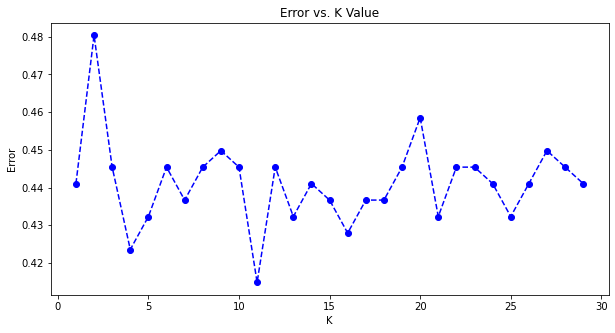

In [34]:
from sklearn.neighbors import KNeighborsClassifier

error_knn = []
for i in range(1, 30):
 knn = KNeighborsClassifier(n_neighbors = i)
 knn.fit(X_train, Y_train)
 pred_i = knn.predict(X_test)
 error_knn.append(np.mean(pred_i != Y_test))

plt.figure(figsize=(10, 5))
plt.plot(range(1, 30), error_knn, color = 'blue', linestyle = 'dashed', marker = 'o')
plt.title('Error vs. K Value')
plt.xlabel('K')
plt.ylabel('Error')

In [35]:
k = error_knn.index(min(error_knn)) + 1
k

11

In [37]:
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(X_train,Y_train)
knn_pred = knn.predict(X_test)
knn_score = accuracy_score(Y_test, knn_pred)

In [38]:
knn_accuracy=np.round((knn_score)*100,2)
knn_accuracy

58.52

# Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,Y_train)
PREDICTIONS=model.predict(X_test)

In [41]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,PREDICTIONS))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.20      0.25      0.22         8
           5       0.63      0.68      0.66        88
           6       0.65      0.52      0.57        97
           7       0.53      0.66      0.58        29
           8       0.18      0.40      0.25         5

    accuracy                           0.58       229
   macro avg       0.37      0.42      0.38       229
weighted avg       0.60      0.58      0.58       229



C:\Users\manga\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\manga\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\manga\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
dt_score=accuracy_score(Y_test,PREDICTIONS)

In [46]:
dt_accuracy=np.round((dt_score)*100,2)
dt_accuracy

58.08

# Result

In [49]:
models = pd.DataFrame({
     'Model': ['Support Vector Machine', 'Decision Tree', 
               'K-Nearest Neighbors', 'Random Forest',"Logistic regression"],
    'Score': [svm_accuracy, dt_accuracy, 
               knn_accuracy, rf_accuracy,logreg_accuracy]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,63.32
2,K-Nearest Neighbors,58.52
1,Decision Tree,58.08
4,Logistic regression,58.08
0,Support Vector Machine,52.40
